In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
with open('KGF.dat') as f:
    image_original = np.loadtxt(f, dtype=float)
#normalize for simplicity
image_original /= np.max(image_original)

#ryan's stretching suggestion
#length, width = image_original.shape
#image_stretched = np.zeros((3*length, 3*width))
#for i in range(length):
#    for j in range(width):
#        image_stretched[3*i:3*i+3, 3*j:3*j+3] = image_original[i,j]
#plt.close()
#plt.imshow(image_stretched, cmap='gray')
#plt.tight_layout()
#image_original = np.copy(image_stretched)


<IPython.core.display.Javascript object>


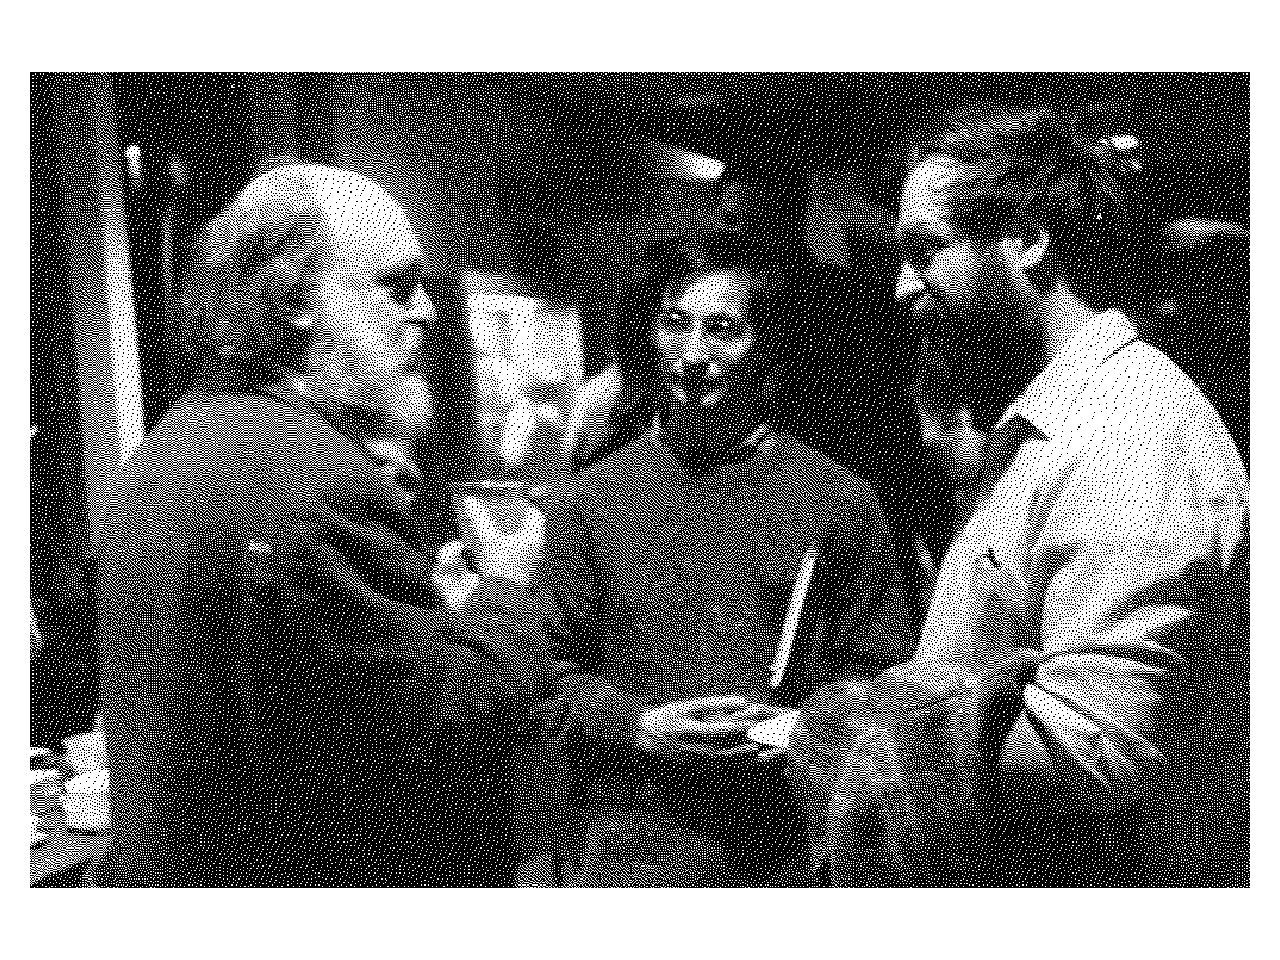

In [2]:
"""
floyd-steinberg filter
  * 7
3 5 1 (1/16)

WARNING: image_original IS MODIFIED HERE

thank you to the kind soul who put pseudocode
on the floyd-steinberg wikipedia page
"""
length, width = image_original.shape
image_dithered = np.zeros_like(image_original)
for j in range(width):
    for i in range(length):
        oldpixel = image_original[i,j]
        newpixel = round(oldpixel)
        image_dithered[i,j] = newpixel
        dither_error = oldpixel - newpixel
        if (i == 0) and (j != width-1):
            #left edge, excluding bottom row
            image_original[i+1,j] += (7/16)*dither_error
            image_original[i,j+1] += (5/16)*dither_error
            image_original[i+1,j+1] += (1/16)*dither_error
        elif (i == length-1) and (j != width-1):
            #right edge, excluding bottom row
            image_original[i-1,j+1] += (3/16)*dither_error
            image_original[i,j+1] += (5/16)*dither_error
        elif (j == width-1) and (i != length-1):
            #bottom edge, excluding right end
            image_original[i+1,j] += (7/16)*dither_error
        elif (i == length-1) and (j == width-1):
            #bottom right corner, final pixel
            pass
        else:
            image_original[i+1,j] += (7/16)*dither_error
            image_original[i-1,j+1] += (3/16)*dither_error
            image_original[i,j+1] += (5/16)*dither_error
            image_original[i+1,j+1] += (1/16)*dither_error
plt.close()
plt.imshow(image_dithered, cmap='gray')
plt.axis('off')
plt.tight_layout()
#plt.savefig('KGF_diffuse.png', dpi=300)